In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import os
import cv2

Using TensorFlow backend.


In [2]:
datadir='C:/Users/Lenovo/Desktop/Ram_Perceptrons/CNN/Fruits2'
categories=['Apple','Orange','Banana']

# Converting images to matrix

In [3]:
dataset=[]
dim=80
for c in categories:
    category_loc=os.path.join(datadir,c)
    if c=='Apple':
        label=0
    elif c=='Orange':
        label=1
    else:
        label=2
    for img in os.listdir(category_loc):
        images=cv2.imread(os.path.join(category_loc,img),cv2.IMREAD_GRAYSCALE)
        images=cv2.resize(images,(dim,dim))
        dataset.append([images,label])

In [4]:
dataset[0]

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 0]

In [5]:
import random
random.shuffle(dataset)

In [6]:
X=[]
y=[]
for i in dataset:
    X.append(i[0])
    y.append(i[1])

In [7]:
X[0]

array([[105, 143, 175, ..., 207, 194, 173],
       [125, 164, 180, ..., 195, 189, 172],
       [135, 161, 178, ..., 177, 181, 177],
       ...,
       [ 68,  75,  84, ..., 147, 147, 142],
       [ 81,  85,  87, ..., 139, 139, 141],
       [ 98,  97,  97, ..., 136, 136, 140]], dtype=uint8)

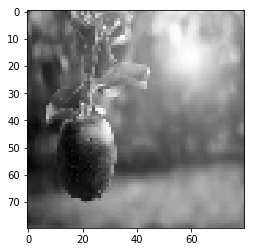

In [8]:
plt.imshow(X[0],cmap='gray')
plt.show()

In [9]:
y[0]

0

In [10]:
y

[0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0]

In [11]:
X=np.array(X)
y=np.array(y)

In [12]:
y

array([0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0,
       1, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 1,
       0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1,
       1, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 2, 2,
       1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0])

In [13]:
X.shape

(150, 80, 80)

In [14]:
X=X.reshape(-1,dim,dim,1)
X=X.astype('float')
X.shape

(150, 80, 80, 1)

In [15]:
X/=255

# Splitting into train and test data

In [16]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=0)

# CNN

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
model=Sequential()

In [18]:
model.add(Conv2D(80,(3,3),input_shape=(dim,dim,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(80,kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(80,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(X_train,y_train,epochs=50)


Epoch 1/50
120/120 [==============================] - 2s 17ms/step - loss: 1.5336 - accuracy: 0.2667
Epoch 2/50
120/120 [==============================] - 2s 14ms/step - loss: 1.2391 - accuracy: 0.3917
Epoch 3/50
120/120 [==============================] - 2s 14ms/step - loss: 1.0695 - accuracy: 0.4500
Epoch 4/50
120/120 [==============================] - 2s 14ms/step - loss: 0.9830 - accuracy: 0.5250
Epoch 5/50
120/120 [==============================] - 2s 15ms/step - loss: 0.9252 - accuracy: 0.5333
Epoch 6/50
120/120 [==============================] - 2s 14ms/step - loss: 0.8383 - accuracy: 0.6500
Epoch 7/50
120/120 [==============================] - 2s 14ms/step - loss: 0.8269 - accuracy: 0.5500
Epoch 8/50
120/120 [==============================] - 2s 14ms/step - loss: 0.7493 - accuracy: 0.6333
Epoch 9/50
120/120 [==============================] - 2s 14ms/step - loss: 0.7238 - accuracy: 0.6667
Epoch 10/50
120/120 [==============================] - 2s 14ms/step - loss: 0.7077 - accur

In [20]:
predict=model.predict(X_test)
predict*100

array([[1.8046759e-02, 3.7486234e+00, 9.6233330e+01],
       [6.2064569e-02, 8.9951429e+00, 9.0942795e+01],
       [1.6275906e-03, 9.9998367e+01, 1.0897243e-06],
       [4.9042706e+00, 9.5095352e+01, 3.8309096e-04],
       [9.1714937e-06, 1.9097896e-02, 9.9980896e+01],
       [6.1185074e+01, 3.8814926e+01, 2.9734210e-06],
       [9.9999893e+01, 1.0561366e-04, 9.2626201e-10],
       [9.8347282e+01, 1.6371801e+00, 1.5534429e-02],
       [1.0000000e+02, 6.3843160e-08, 1.3137927e-14],
       [4.8060212e-08, 2.9848242e-02, 9.9970146e+01],
       [6.9264718e-07, 3.4811143e-02, 9.9965195e+01],
       [1.0314816e+00, 9.8961678e+01, 6.8420931e-03],
       [2.6064160e-01, 9.9733932e+01, 5.4273796e-03],
       [2.0165178e-01, 9.9766632e+01, 3.1719889e-02],
       [2.1575016e-01, 9.9782570e+01, 1.6776723e-03],
       [5.1362977e+00, 9.4863678e+01, 1.9631918e-05],
       [1.9114774e-04, 6.7116812e-02, 9.9932693e+01],
       [2.3245134e+01, 7.6718414e+01, 3.6458239e-02],
       [3.2444664e+01, 6.755

In [21]:
y_test

array([2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2,
       0, 0, 1, 1, 0, 0, 2, 2])

In [22]:
def new_pred(loc):
    images=cv2.imread(loc,cv2.IMREAD_GRAYSCALE)
    images=cv2.resize(images,(dim,dim))
    x_new=np.array(images)
    x_new=x_new.reshape(-1,dim,dim,1)
    x_new=x_new.astype('float')
    x_new/=255
    return pd.DataFrame(model.predict(x_new)*100)

# Prediction for single image

In [23]:
loc='C:/Users/Lenovo/Desktop/Ram_Perceptrons/CNN/Fruits/22.jpg'
new_pred(loc)

,0,1,2
0,100.0,0.000005,4.034429e-10


In [24]:
loc='C:/Users/Lenovo/Desktop/Ram_Perceptrons/CNN/Fruits/77.jpg'
new_pred(loc)

,0,1,2
0,4.904277,95.095337,0.000383


In [25]:
loc='C:/Users/Lenovo/Desktop/Ram_Perceptrons/CNN/Fruits/test-a3.jpg'
new_pred(loc)

,0,1,2
0,97.973839,2.026165,0.000003


In [26]:
loc='C:/Users/Lenovo/Desktop/Ram_Perceptrons/CNN/Fruits/test-a4.jpg'
new_pred(loc)

,0,1,2
0,68.457451,31.509966,0.032586


In [27]:
loc='C:/Users/Lenovo/Desktop/Ram_Perceptrons/CNN/Fruits/test-b.jpg'
new_pred(loc)

,0,1,2
0,2.801845e-09,0.040917,99.959084
